In [1]:
import scanpy as sc
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad('control_annotated_data.h5ad')

In [3]:
print(adata)

AnnData object with n_obs × n_vars = 96303 × 45947
    obs: 'cell_type_category', 'manuscript_id', 'subclass_id', 'disease', 'subject_id', 'age'
    var: 'HGNC_Alt_GeneID'


In [4]:
sc.pp.filter_cells(adata, min_genes=100, inplace=True)

In [5]:
sc.pp.filter_genes(adata, min_cells=3, inplace=True)

In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [7]:
sc.pp.log1p(adata)

In [8]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

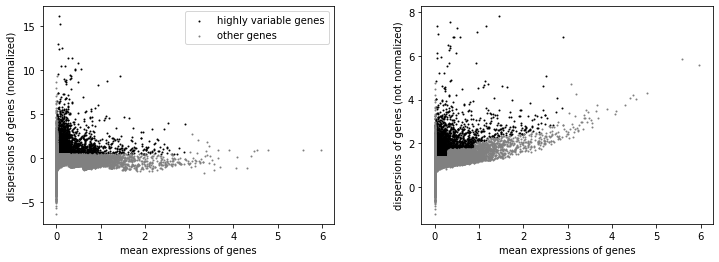

In [9]:
sc.pl.highly_variable_genes(adata)

In [10]:
adata = adata[:, adata.var.highly_variable]

In [11]:
print(adata)

View of AnnData object with n_obs × n_vars = 96303 × 4443
    obs: 'cell_type_category', 'manuscript_id', 'subclass_id', 'disease', 'subject_id', 'age', 'n_genes'
    var: 'HGNC_Alt_GeneID', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


In [12]:
#sc.pp.scale(adata, max_value=10)

In [13]:
# Example Subsetting For Controls
#controls = adata[adata.obs['subject_id'].str[-1:] == 'C']

In [14]:
sc.tl.pca(adata, svd_solver='arpack')

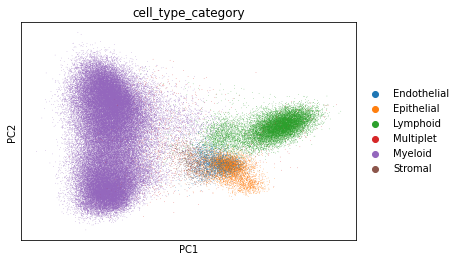

In [15]:
sc.pl.pca(adata, color='cell_type_category')

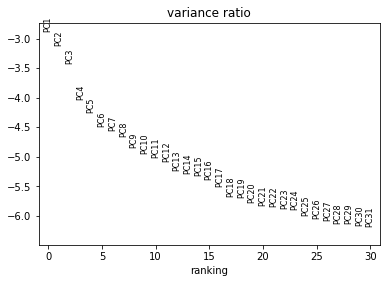

In [16]:
sc.pl.pca_variance_ratio(adata, log=True)

In [17]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [18]:
sc.tl.umap(adata)

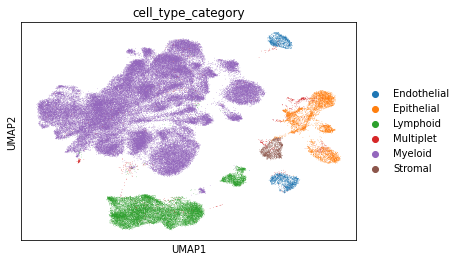

In [19]:
sc.pl.umap(adata, color=['cell_type_category'])

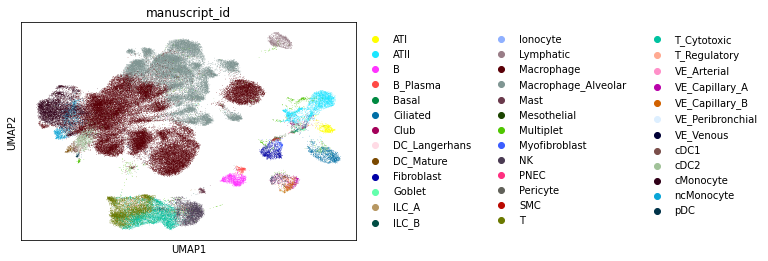

In [21]:
sc.pl.umap(adata, color=['manuscript_id'])

In [27]:
print(adata.obsm['X_pca'].shape)

(96303, 50)


In [24]:
print(adata.obsm['X_umap'])

[[-7.219336    9.850314  ]
 [ 1.7723752  14.367751  ]
 [ 2.0271776  -2.662155  ]
 ...
 [-2.7403624   7.3163047 ]
 [-3.04603    -4.6976056 ]
 [ 0.41213548 14.007571  ]]


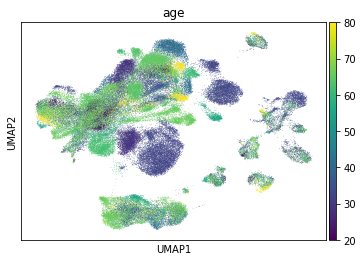

In [22]:
sc.pl.umap(adata, color=['age'])

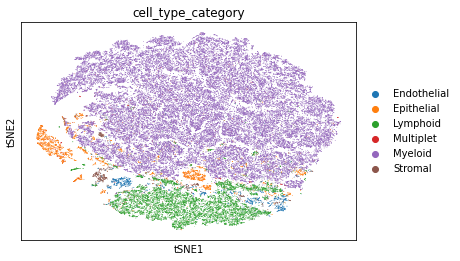

In [41]:
sc.tl.tsne(adata)
sc.pl.tsne(adata, color=['cell_type_category'])